# Лабораторная работа "Ансамбли моделей машинного обучения"
## Цель работы
Изучение ансамблей моделей машинного обучения.


## Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
1. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
1. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
1. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.
1. Произведите для каждой модели подбор значений одного гиперпараметра. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
1. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

## Загрузка датасета

In [1]:
# Подключение Google диска для загрузки датасета
from google.colab import drive
drive.mount('/gdrive')
%load_ext tensorboard.notebook

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install git+git://github.com/kvoyager/GmdhPy.git

  Cloning git://github.com/kvoyager/GmdhPy.git to /tmp/pip-req-build-kgmd56th
  Running command git clone -q git://github.com/kvoyager/GmdhPy.git /tmp/pip-req-build-kgmd56th
  Stored in directory: /tmp/pip-ephem-wheel-cache-roq6qv38/wheels/69/6c/43/d6d9c8729bf1a2dce40efe68fa2919dad6f2d69fbc9e58353b
Successfully built GmdhPy


In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
os.listdir()
data = pd.read_csv('/gdrive/My Drive/Colab Notebooks/ММО/lab5/glass.csv',
                   sep=",")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## train_test_split

In [0]:
from sklearn.model_selection import train_test_split
glassType = data["Type"]
data3 = data.drop(["Type"], axis=1)
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(
    data3, glassType, test_size=0.2, random_state=1)

## Обучение

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

template = "Значение на тренируемой выборке: {:.2%} \
значение на тестовой выборке: {:.2%}"


class Classifier():
  def __init__(self, method, x_train, y_train, x_test, y_test):
    self._method = method
    self.x_train = x_train
    self.y_train = y_train
    self.x_test = x_test
    self.y_test = y_test
    self.target_1 = []
    self.target_2 = []
    
  def training(self):
    self._method.fit(self.x_train, self.y_train)
    self.target_1 = self._method.predict(self.x_train)
    self.target_2 = self._method.predict(self.x_test)
    
  def result(self, metric):
    print(template.format(metric(self.y_train, self.target_1), 
                      metric(self.y_test, self.target_2)))

## RandomForestClassifier

In [7]:
rfr = Classifier(RandomForestClassifier(max_features=1), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
rfr.training()
rfr.result(mean_squared_error)

Значение на тренируемой выборке: 5.26% значение на тестовой выборке: 139.53%


## GradientBoostingClassifier

In [8]:
gbc = Classifier(GradientBoostingClassifier(max_features=1), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
gbc.training()
gbc.result(mean_squared_error)

Значение на тренируемой выборке: 0.00% значение на тестовой выборке: 55.81%


## Подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации
### RandomForestClassifier

In [9]:
n_range = np.array(range(3,10,1))
tuned_parameters = [{'max_features': n_range}]
tuned_parameters

[{'max_features': array([3, 4, 5, 6, 7, 8, 9])}]

In [10]:
from sklearn.model_selection import GridSearchCV

cl_rfc_gs = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                      scoring='accuracy')
cl_rfc_gs.fit(data_X_train, data_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [11]:
cl_rfc_gs.best_params_

{'max_features': 4}

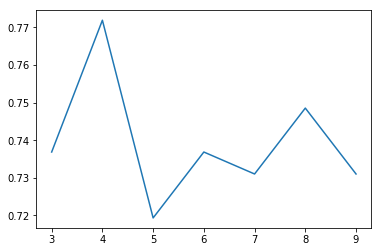

In [12]:
plt.plot(n_range, cl_rfc_gs.cv_results_['mean_test_score'])

### GradientBoostingClassifier

In [13]:
n_range = np.array(range(4,9,1))
tuned_parameters = [{'max_features': n_range}]
tuned_parameters

[{'max_features': array([4, 5, 6, 7, 8])}]

In [14]:
cl_gbc_gs = GridSearchCV(GradientBoostingClassifier(), tuned_parameters, cv=3,
                      scoring='accuracy')
cl_gbc_gs.fit(data_X_train, data_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [15]:
cl_gbc_gs.best_params_

{'max_features': 5}

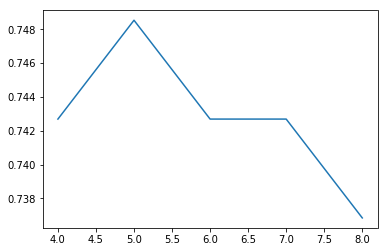

In [16]:
plt.plot(n_range, cl_gbc_gs.cv_results_['mean_test_score'])

## Сравнение модели с произвольным и лучшим параметром K

In [17]:
rfr2 = Classifier(RandomForestClassifier(max_features=8), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
rfr2.training()
rfr2.result(mean_squared_error)

Значение на тренируемой выборке: 8.77% значение на тестовой выборке: 134.88%


In [18]:
rfr.result(mean_squared_error)

Значение на тренируемой выборке: 5.26% значение на тестовой выборке: 139.53%


In [19]:
gbc2 = Classifier(GradientBoostingClassifier(max_features=8), data_X_train, 
                    data_y_train, data_X_test, data_y_test)
gbc2.training()
gbc2.result(mean_squared_error)

Значение на тренируемой выборке: 0.00% значение на тестовой выборке: 76.74%


In [20]:
gbc.result(mean_squared_error)

Значение на тренируемой выборке: 0.00% значение на тестовой выборке: 55.81%


Как можно заметить, для классификаторов правильный подбор гиперпараметра существеннее исправил ошибку.